In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import math
import random

In [3]:
x1,y1 = [], []
x2,y2 = [], []

for line in open('train-perceptron.txt', 'r'):
    values = [float(s) for s in line.split()]
    if(values[2] == 1):
        x1.append(values[0])
        y1.append(values[1])

    if(values[2] == 2):
        x2.append(values[0])
        y2.append(values[1])

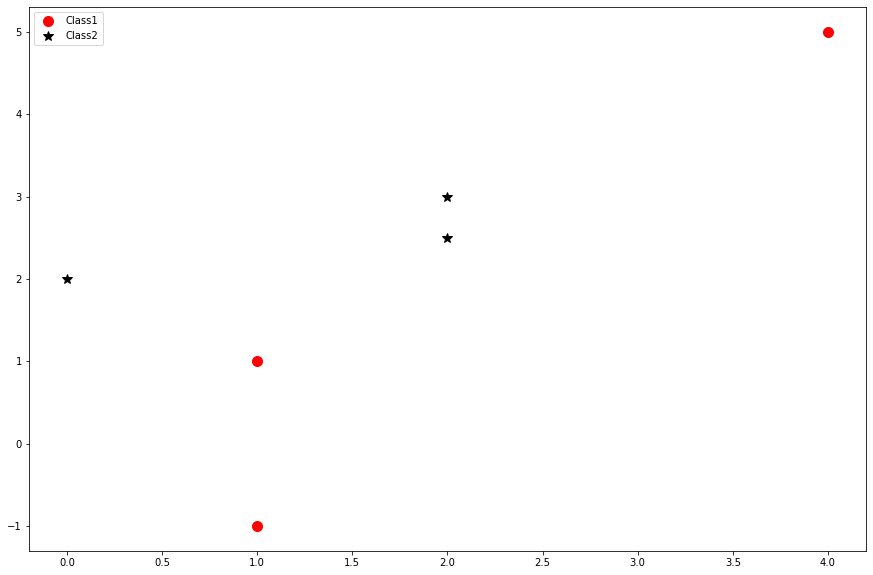

In [4]:
plt.figure(figsize=(15, 10))
 
red_dot, = plt.plot(x1,y1,'ro',markersize = 10) # red dot
blk_str, = plt.plot(x2,y2,'ok',marker='*',markersize=10) # black *

plt.legend([red_dot, blk_str], ["Class1", "Class2"])


plt.plot()
plt.show()

In [5]:
#for class 1
sixDC1 = []
for i in range(len(x1)):
    l1 = []
    X1 = pow(x1[i],2)
    l1.append(X1)
    X2 =  pow(y1[i],2)
    l1.append(X2)
    X3 = x1[i]*y1[i]
    l1.append(X3)
    l1.append(x1[i])
    l1.append(y1[i])
    l1.append(1)
    sixDC1.append(l1)
    
print(sixDC1)

[[1.0, 1.0, 1.0, 1.0, 1.0, 1], [1.0, 1.0, -1.0, 1.0, -1.0, 1], [16.0, 25.0, 20.0, 4.0, 5.0, 1]]


In [6]:
#for class 2
sixDC2 = []
for i in range(len(x2)):
    l1 = []
    X1 =-1 * pow(x2[i],2)
    l1.append(X1)
    X2 = -1 * pow(y2[i],2)
    l1.append(X2)
    X3 =-1 * x2[i] * y2[i]
    l1.append(X3)
    l1.append(-1 * x2[i])
    l1.append(-1 * y2[i])
    l1.append(-1)
    
    sixDC2.append(l1)
    
print(sixDC2)

[[-4.0, -6.25, -5.0, -2.0, -2.5, -1], [-0.0, -4.0, -0.0, -0.0, -2.0, -1], [-4.0, -9.0, -6.0, -2.0, -3.0, -1]]


In [7]:
sixDClasses = sixDC1 + sixDC2
sixDClasses = np.array(sixDClasses)
print(sixDClasses)


[[ 1.    1.    1.    1.    1.    1.  ]
 [ 1.    1.   -1.    1.   -1.    1.  ]
 [16.   25.   20.    4.    5.    1.  ]
 [-4.   -6.25 -5.   -2.   -2.5  -1.  ]
 [-0.   -4.   -0.   -0.   -2.   -1.  ]
 [-4.   -9.   -6.   -2.   -3.   -1.  ]]


In [34]:
#w = np.array([0,0,0,0,0,0])
w = np.array([1,1,1,1,1,1])

'''
random.seed(10)
A = []
for i in range(int(6)):
     A.append(random.random())
        
w = np.array(A)
'''
w

array([1, 1, 1, 1, 1, 1])

In [35]:
#answer = [all(n >= 1 for n in i) for i in sixDClasses]
#answer
answer = False
data1 = []
data2 = []

In [36]:
'''
for i in range(len(answer)):
    if(bool(answer[i])==True):
        print(sixDClasses[i])
'''     

'\nfor i in range(len(answer)):\n    if(bool(answer[i])==True):\n        print(sixDClasses[i])\n'

In [37]:
#learning rate is 1
def manyAtATime(lst,w,n):
    flag = 0
    updtW = w
    WY = []
    forW = []
    temp = []
    j = 0
    #print(lst)
    while flag != 1:
        j = j+1
        
        for i in range(int(6)):
            temp = sum(lst[i] * updtW)
            WY.append(temp)
            #rint("Temp : ",temp)
       # print(WY)
        answer = [all(i>0 for i in WY)]
        #print(answer)
        if(answer[0] == False):
            for i in range(len(updtW)):
                if(WY[i] <= 0):
                    #print(WY[i]," ",lst[i])
                    forW.append(lst[i])
                    temp = np.array(forW)
        else:
            print(j)
            flag = 1
            data1.append(j)
            break
        #print("temp",temp)   
        WY = []  
        forW= []
        temp1 = (temp.sum(axis = 0))
        updtW = updtW + n * temp1   
        #print(j)
        #print("Update Weight : ",updtW)
        

In [38]:
a = 10
n = 0.0
for i in range(a):
    n = n + .1
    print("N = ",n,"\n")
    manyAtATime(sixDClasses,w,n)
    print("--------------------END----------------------")
    print("\n")


N =  0.1 

102
--------------------END----------------------


N =  0.2 

104
--------------------END----------------------


N =  0.30000000000000004 

91
--------------------END----------------------


N =  0.4 

116
--------------------END----------------------


N =  0.5 

105
--------------------END----------------------


N =  0.6 

114
--------------------END----------------------


N =  0.7 

91
--------------------END----------------------


N =  0.7999999999999999 

91
--------------------END----------------------


N =  0.8999999999999999 

105
--------------------END----------------------


N =  0.9999999999999999 

106
--------------------END----------------------




In [39]:
#for one at a time 
def singleUpdate(lst,w,n):
    flag = 0
    updtW = w
    WY = []
    j = 0
    while flag != 1:
        for i in range(len(updtW)):
            temp = sum(lst[i] * updtW)
            if(temp>0):
                updtW = updtW
            else:
                updtW = updtW + n*lst[i]
                #print("Update Weight : ",updtW)
            WY.append(temp)
            #rint("Temp : ",temp)
            
        j = j + 1
        print(j)
       #print("WY",WY)
        answer = [all(i>0 for i in WY)]
        print(answer,"\n")
        if(answer[0] == True):
            #print(WY)
            data2.append(j)
            break
        else:
            WY = []
        

In [40]:
#singleUpdate(sixDClasses,w,.1)

In [41]:
a = 10
N = 0.0
for i in range(a):
    N = N + .1
    print("N = ",N,"\n")
    singleUpdate(sixDClasses,w,N)
    print("--------------------END----------------------")
    print("\n")



N =  0.1 

1
[False] 

2
[False] 

3
[False] 

4
[False] 

5
[False] 

6
[True] 

--------------------END----------------------


N =  0.2 

1
[False] 

2
[False] 

3
[False] 

4
[False] 

5
[False] 

6
[False] 

7
[False] 

8
[False] 

9
[False] 

10
[False] 

11
[False] 

12
[False] 

13
[False] 

14
[False] 

15
[False] 

16
[False] 

17
[False] 

18
[False] 

19
[False] 

20
[False] 

21
[False] 

22
[False] 

23
[False] 

24
[False] 

25
[False] 

26
[False] 

27
[False] 

28
[False] 

29
[False] 

30
[False] 

31
[False] 

32
[False] 

33
[False] 

34
[False] 

35
[False] 

36
[False] 

37
[False] 

38
[False] 

39
[False] 

40
[False] 

41
[False] 

42
[False] 

43
[False] 

44
[False] 

45
[False] 

46
[False] 

47
[False] 

48
[False] 

49
[False] 

50
[False] 

51
[False] 

52
[False] 

53
[False] 

54
[False] 

55
[False] 

56
[False] 

57
[False] 

58
[False] 

59
[False] 

60
[False] 

61
[False] 

62
[False] 

63
[False] 

64
[False] 

65
[False] 

66
[False] 

67
[False]

[False] 

65
[False] 

66
[False] 

67
[False] 

68
[False] 

69
[False] 

70
[False] 

71
[False] 

72
[False] 

73
[False] 

74
[False] 

75
[False] 

76
[False] 

77
[False] 

78
[False] 

79
[False] 

80
[False] 

81
[False] 

82
[False] 

83
[False] 

84
[False] 

85
[False] 

86
[False] 

87
[False] 

88
[False] 

89
[False] 

90
[False] 

91
[False] 

92
[False] 

93
[False] 

94
[False] 

95
[False] 

96
[False] 

97
[False] 

98
[False] 

99
[False] 

100
[False] 

101
[False] 

102
[False] 

103
[False] 

104
[False] 

105
[False] 

106
[False] 

107
[False] 

108
[False] 

109
[False] 

110
[False] 

111
[False] 

112
[False] 

113
[False] 

114
[False] 

115
[True] 

--------------------END----------------------


N =  0.8999999999999999 

1
[False] 

2
[False] 

3
[False] 

4
[False] 

5
[False] 

6
[False] 

7
[False] 

8
[False] 

9
[False] 

10
[False] 

11
[False] 

12
[False] 

13
[False] 

14
[False] 

15
[False] 

16
[False] 

17
[False] 

18
[False] 

19
[False] 



In [42]:
data1

[102, 104, 91, 116, 105, 114, 91, 91, 105, 106]

In [43]:
data2

[6, 92, 104, 106, 93, 93, 108, 115, 94, 94]

In [44]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

Text(0, 0.5, 'No of iterations')

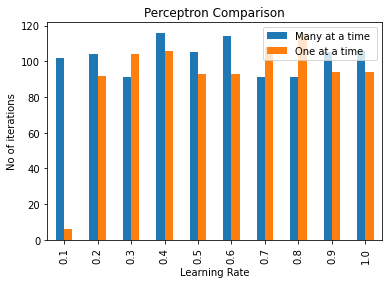

In [45]:
learningRate = ['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1.0']
df = pd.DataFrame({"Many at a time ": data1, "One at a time ": data2}, index=learningRate)
x = df.plot.bar()
x.set_title('Perceptron Comparison')
x.set_xlabel('Learning Rate')
x.set_ylabel('No of iterations')


In [46]:
learningRate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
table = {"Learning Rate ": learningRate," Many at a time ": data1," One at a time ": data2}
df = pd.DataFrame(table)
df

,Many at a time,One at a time,Learning Rate
0,102,6,0.1
1,104,92,0.2
2,91,104,0.3
3,116,106,0.4
4,105,93,0.5
5,114,93,0.6
6,91,108,0.7
7,91,115,0.8
8,105,94,0.9
9,106,94,1.0
